In [9]:
root = "/content/drive/MyDrive/MTL782-Memes Classifier/dataminingmtl782/"

In [10]:
import pandas as pd
df = pd.read_csv(root+"train.csv")

In [11]:
df.head()

,ID,image id,text,label,label_num
0,1,image_2455.jpg,- It is not our fight - Are we not part of thi...,troll,2
1,2,image_3701.jpg,THAT'S THE DIFFERENCE BETWEEN YOU AND ME YOU...,none,0
2,3,image_4166.png,- WHAT DO THE TITANIC AND THE SIXTH SENSE HAVE...,none,0
3,4,448_image_batch_2.png,"""COME ON MAN, YOU KNOW THE THING.\r\nJUST ASK ...",troll,2
4,5,653_image_batch_2.png,"""Those who believe without reason cannot be co...",none,0


In [13]:
df['len_text']= df['text'].apply(lambda x:len(x.split()))
sorted(df['len_text'],reverse=True)

[96,
 94,
 71,
 65,
 60,
 53,
 53,
 53,
 53,
 52,
 49,
 49,
 49,
 48,
 48,
 46,
 46,
 45,
 45,
 45,
 45,
 44,
 43,
 43,
 43,
 43,
 42,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,


## Pre-processing

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict
import regex as re
from keras.preprocessing import image as keras_image
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def preprocess_image(filepath):
  img = keras_image.load_img(filepath , target_size=(224, 224), interpolation='bicubic')
  img = img.copy()
  img = keras_image.img_to_array(img)
  img = img/255.0

  return img

def preprocess_txt(text):
  tag_map = defaultdict(lambda: wn.NOUN)
  tag_map['J'] = wn.ADJ
  tag_map['V'] = wn.VERB
  tag_map['R'] = wn.ADV
  word_Lemmatized = WordNetLemmatizer()
  text = text.lower()
  text = re.sub(r"\n"," ",text)
  text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
  text = re.sub(r'http\S+', '', text)
  stop = stopwords.words('english')
  pat = r'\b(?:{})\b'.format('|'.join(stop))
  text = text.replace(pat, '')
  text = text.replace(r'\s+', ' ')
  text = re.sub(r'[^a-zA-Z0-9 -]', '', text)
  text = re.sub('@[^\s]+','',text)
  #text = word_tokenize(text)
  #Final_words = []
  #for word, tag in pos_tag(text):
  #    word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
  #    Final_words.append(word_Final)
  #text = " ".join(Final_words)

  return text

In [8]:
# import pytesseract
import os
# from preprocessing import preprocess_image, preprocess_txt
import pickle
import pandas as pd
try:
    from PIL import Image
except ImportError:
    import Image

root = "/content/drive/MyDrive/MTL782-Memes Classifier/dataminingmtl782/"
train_path = "train_images/train_images"

In [9]:
data = {"image": [], "filepath": [], "text": [], "label": []}

df = pd.read_csv(root+"train.csv")
for index, row in df.iterrows():
    img_, text_, label_ = row["image id"], row["text"], int(row["label_num"])
    print(img_+": "+text_,end="\n")
    try:
        '''
        if dirname == './dataset/positive':
            data['label'].append(int(1))
        if dirname == './dataset/neutral':
            data['label'].append(int(2))
        if dirname == './dataset/negative':
            data['label'].append(int(0))
        '''
        data['label'].append(label_)

        data['image'].append(
            preprocess_image(
                os.path.join(root+train_path, img_)))

        data['filepath'].append(
            os.path.join(img_))

        data['text'].append(
            preprocess_txt(text_))

    except Exception as e:
        print(e)
        continue

    print('\timages: {} texts: {} labels : {}\n'.format(len(data['image']), len(data['text']), len(data['label'])), end='')



image_2455.jpg: - It is not our fight - Are we not part of this world? - No  we are not even in the book!
	images: 1 texts: 1 labels : 1
image_3701.jpg:  THAT'S THE DIFFERENCE BETWEEN YOU AND ME  YOU WANNA LOSE SMALL  I WANNA WIN BIG! SCOOPWHOOP.com HARVEY SPECTER QUOTES
	images: 2 texts: 2 labels : 2
image_4166.png: - WHAT DO THE TITANIC AND THE SIXTH SENSE HAVE IN COMMON? Made with FUMATIC ICY DEAD PEOPLE UNKNOWN PUNster 2017 Made with FUMATIC That's cold. #UnKNOWN_PUNster
	images: 3 texts: 3 labels : 3
448_image_batch_2.png: "COME ON MAN, YOU KNOW THE THING.
JUST ASK MY WIFE JOE THE DOG FACED PONY."
	images: 4 texts: 4 labels : 4
653_image_batch_2.png: "Those who believe without reason cannot be convinced by reason."
-James Randi

	images: 5 texts: 5 labels : 5
image_1368.jpg: #AFRIENDOFMINE SPEAKS OPENLY ABOUT CONTRACEPTION HAS AWESOME SAFER SEX
	images: 6 texts: 6 labels : 6
image_3471.jpg: #PAPPUSODUFFER AMUL IS THE TASTE OF INDIA  PAPPU IS THE WASTE OF INDIA makeameme.org
	image

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


	images: 169 texts: 169 labels : 169
image_2584.jpg: BEING NORMAL?! I just can't imagine how awful that must be!
	images: 170 texts: 170 labels : 170
image_1703.jpg: BEN DANY
	images: 171 texts: 171 labels : 171
image_2007.png: Bernie I'M VOTING FOR BERNIE SANDERS NOT HILLARY CLINTON. ATTN DNC  IT'S BERNIE SANDERS ALL THE WAY OR THE HIGHWAY! memes.com
	images: 172 texts: 172 labels : 172
image_6575.jpg: BEST FRIEND DOESN'T LIKE LORD OF THE RINGS? LORD OF THE RINGS MARATHON
	images: 173 texts: 173 labels : 173
image_5054.png: BEST OF 2017 (SOFAR) 31 Adult Film Stars And Their Transformations For The Camera https://t.co/hfg6V9iS9k https://t.co/NpxBUr8rs3
	images: 174 texts: 174 labels : 174
image_281.png: Best of 2017... "My new hero. Merica." FATHER WHO BEAT MAN TO DEATH FOR RAPING HIS FIVE YEAR OLD DAUGHTER FACES NO CHARGES IN TEXAS
	images: 175 texts: 175 labels : 175
image_6743.png: BETTER GRAB A HAM BECAUSE THERE MIGHT NOT BE ANY TURKEY LEFT BY CHRISTMAS bar Haha.. Well True.. russi

In [10]:

with open("data_train1.pkl", "wb") as pickle_out:
    pickle.dump(data, pickle_out)
pickle_out.close()

In [11]:
!cp "/content/data_train1.pkl" "/content/drive/MyDrive/MTL782-Memes Classifier/"

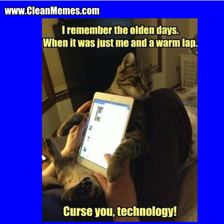

In [12]:
import pandas as pd
df = pd.read_csv(root+"test.csv")
df.head()


,ID,image id,text
0,2001,106_image.png,TRUMP CURES CORONAVIRUS!\r\n\r\nCURING CORONA ...
1,2002,150_image.png,THE TWO BIGGEST THREATS TO AMERICA\r\n\r\nTHE ...
2,2003,153_image.png,"UGLY INSIDE & OUT\r\n\r\nRACIST, LIAR with NO ..."
3,2004,169_image.png,Our elders were called to war to save lives.\r...
4,2005,10_image_batch_2.png,This is how thousands were murdered by our gov...


In [13]:
# import pytesseract
import os
# from preprocessing import preprocess_image, preprocess_txt
import pickle
import pandas as pd
try:
    from PIL import Image
except ImportError:
    import Image

root = "/content/drive/MyDrive/MTL782-Memes Classifier/dataminingmtl782/"
test_path = "test_images"

In [14]:
data = {"image": [], "filepath": [], "text": [], "label": []}

df = pd.read_csv(root+"test.csv")
for index, row in df.iterrows():
    img_, text_, label_ = row["image id"], row["text"], -1
    print(img_+": "+text_,end="\n")
    try:
        '''
        if dirname == './dataset/positive':
            data['label'].append(int(1))
        if dirname == './dataset/neutral':
            data['label'].append(int(2))
        if dirname == './dataset/negative':
            data['label'].append(int(0))
        '''
        data['label'].append(label_)

        data['image'].append(
            preprocess_image(
                os.path.join(root+test_path, img_)))

        data['filepath'].append(
            os.path.join(img_))

        data['text'].append(
            preprocess_txt(text_))

    except Exception as e:
        print(e)
        continue

    print('\timages: {} texts: {} labels : {}\n'.format(len(data['image']), len(data['text']), len(data['label'])), end='')



106_image.png: TRUMP CURES CORONAVIRUS!

CURING CORONA VIRUS IS RACIST

WE HAVE THE RIGHT TO DIE FROM OUR CORONAVIRUS

DEMOCRATS ARE OUTRAGED!

	images: 1 texts: 1 labels : 1
150_image.png: THE TWO BIGGEST THREATS TO AMERICA

THE WORST SENATE LEADER EVER AND THE MOST CORRUPT PRESIDENT EVER

	images: 2 texts: 2 labels : 2
153_image.png: UGLY INSIDE & OUT

RACIST, LIAR with NO ETHICS, and he's NUTS

Dangerously STUPID and Certifiably CRAZY

UGLY INSIDE & OUT
	images: 3 texts: 3 labels : 3
169_image.png: Our elders were called to war to save lives.
We are being called to sit on the couch to save theirs.
We can do this.

	images: 4 texts: 4 labels : 4
10_image_batch_2.png: This is how thousands were murdered by our government. 
Tied to chairs. 
Denied family visits. 
Alone.
Abandoned.

What should we do
to the government?

	images: 5 texts: 5 labels : 5
101_image_batch_2.png: To help Donald Trump get the full COVID-19 experience, let's make sure he loses his job and is evicted from his hom

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


	images: 564 texts: 564 labels : 564
image_6771.jpg: Rahul Gandhi after his speech YOU CANNOT BE SERIOUS People after Rahul Gandhi's speech
	images: 565 texts: 565 labels : 565
image_6775.png: NARENDRA BHAI  RAHUL IS BACK. WHEN'S THR NEXT COMEDY SHOW?
	images: 566 texts: 566 labels : 566
image_6790.jpg: HAPPY BIRTHDAY HAPPY-WISHES.NET SO HAPPY TO SEE YOU GROWING
	images: 567 texts: 567 labels : 567
image_6794.jpg: VOTE FOR ME AS PRESIDENT BECAUSE NOW APPARENTLY ANY REAL STATE MANAGER CAN BECOME PRESIDENT
	images: 568 texts: 568 labels : 568
image_6811.jpg: CHUCK NORRIS GOT A COMPUTER VIRUS AND IT DIED memegenerator.net
	images: 569 texts: 569 labels : 569
image_6815.jpg: Don't blame technology 2016 1916
	images: 570 texts: 570 labels : 570
image_6825.jpg: As an IT person. I rarely know how to fix your issue I'm just better at Google than you are
	images: 571 texts: 571 labels : 571
image_6844.jpg: BUYS IPHONE BECAUSE COULDN'T FIND THE DROID HE WAS LOOKING FOR Soft Ball quickmeme.com
	i

In [15]:
with open("data_test1.pkl", "wb") as pickle_out:
    pickle.dump(data, pickle_out)
pickle_out.close()

In [16]:
!cp "/content/data_test1.pkl" "/content/drive/MyDrive/MTL782-Memes Classifier/"

In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 163kB 26.9MB/s 
     |████████████████████████████████| 2.2MB 39.9MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 3.3MB 53.6MB/s 
     |████████████████████████████████| 870kB 52.8MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=91e02281823fa9d5f4ef3417e06c4daebfecd971579430e6679be42f64935d35
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=cc3002914c89bfa5f4b7904b9bba69adb85c89308b629fc51a3ce8a8d8bdfaba
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built pytesseract sacremoses


In [2]:
!cp "/content/drive/MyDrive/MTL782-Memes Classifier/data_train1.pkl" "./"
!cp "/content/drive/MyDrive/MTL782-Memes Classifier/data_test1.pkl" "./"


In [11]:
!python train.py

2021-04-11 10:51:44.693472: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2021-04-11 10:51:46.693926: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-11 10:51:46.694833: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-11 10:51:46.725106: I tensorflow/str

In [ ]:
# !python predict.py

In [ ]:
import pickle
from model import Classifier

cls = Classifier(epochs=32, batch_size=32, metrics=True, plot_model_diagram=True, summary=True)

with open("data_test1.pkl","rb") as pickle_in:
  data = pickle.load(pickle_in)
pickle_in.close()

pred,val = cls.predict(data)

In [ ]:
print(*val,sep="\n")

In [ ]:
## !!unzip "/content/drive/My Drive/colab/data/glove.6B.zip" -d "/content/drive/My Drive/colab/data/glove/"
!cat "/content/drive/My Drive/colab/data/glove/glove.6B.200d.txt"

In [18]:
!cat model.py

from preprocessing import preprocess_image, preprocess_txt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Concatenate, Input, Dropout, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image as keras_image
from metrics import precision, recall, f1

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

import numpy as np


class Classifier:

    def __init__(self, epochs=32, batch_size=64,metrics = False, plot_model_diagram=False, summary=False):
        self.epochs = epochs
        self.metrics = metrics
        self.batch_size = batch_size
        self.plot_model_diagram = plot_model_diagram
        self.summary = summary
        self.seq_len = 50
        self.bert_layer = TFBertModel.from_p

In [20]:
import pickle
from model import Classifier

cls = Classifier(epochs=32, batch_size=16, metrics=True, plot_model_diagram=True, summary=True)

with open("data_test1.pkl","rb") as pickle_in:
  data = pickle.load(pickle_in)
pickle_in.close()

cls.predict(data)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,





2
0
2
0
0
0
2
2
1
1
0
0
0
0
2
0
0
0
0
1
0
2
0
0
0
1
0
2
2
2
0
2
0
1
0
1
2
0
2
2
2
0
2
2
2
0
2
0
0
1
1
0
0
1
0
0
0
2
0
2
0
2
1
2
1
2
0
1
0
0
1
0
0
1
2
0
0
0
0
0
0
2
0
0
2
1
0
1
1
1
1
0
2
1
0
0
0
2
1
0
2
2
0
0
1
2
0
0
2
0
2
1
0
2
1
0
1
0
0
0
2
2
2
2
0
0
0
1
0
1
1
0
0
0
2
0
0
1
2
0
2
0
2
1
0
0
0
1
0
1
1
1
0
0
0
0
2
0
2
1
1
0
1
0
0
0
0
2
0
0
1
1
1
0
2
0
0
0
0
1
0
1
1
1
0
0
0
2
2
2
2
1
2
1
0
0
0
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
2
0
1
0
0
1
2
0
0
1
0
0
0
0
1
1
1
1
0
0
0
1
1
1
2
2
2
0
1
1
0
0
2
1
0
2
0
1
0
0
1
0
0
2
2
0
0
1
1
0
0
1
2
0
0
2
0
0
2
1
0
0
1
2
2
0
1
2
0
0
0
2
0
0
1
0
0
0
0
1
2
0
0
1
0
2
0
1
0
0
2
0
0
0
1
1
1
0
0
1
2
0
2
0
0
0
1
2
1
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
2
0
0
1
2
0
0
2
0
0
1
0
0
2
0
2
0
2
0
1
1
0
2
0
2
1
1
2
0
0
2
0
2
2
2
0
0
0
0
0
0
0
0
1
2
0
0
0
2
1
0
0
2
0
1
0
2
0
0
0
0
1
1
1
0
0
1
0
1
2
0
0
0
2
0
0
0
1
1
0
0
0
2
0
0
2
0
1
2
1
0
0
1
0
0
0
0
0
0
0
2
2
0
1
0
0
2
0
2
0
2
2
0
2
1
1
0
0
1
2
1
2
0
2
0
0
0
1
1
2
2
0
1
0
0
1
1
0
0
1
0
0
0
2
0
0
1
0
1
0
0
2

(array([[0.0148566 , 0.2071973 , 0.77794605],
        [0.9876643 , 0.00385084, 0.00848483],
        [0.182809  , 0.00332094, 0.81387   ],
        ...,
        [0.24495015, 0.7519895 , 0.00306033],
        [0.45806694, 0.5180691 , 0.02386395],
        [0.13563213, 0.15666018, 0.7077077 ]], dtype=float32),
 array([2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2,
        0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2,
        2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
        0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1,
        1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
        2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1,

In [12]:
## SUB3

!python train.py

2021-04-11 11:09:50.038195: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2021-04-11 11:09:51.984501: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-11 11:09:51.985438: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-11 11:09:52.019687: I tensorflow/str